<a href="https://colab.research.google.com/github/paishowstopper/TSAI/blob/main/EVA5/Session_12/Session_12_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

Uploaded Images and json to colab

In [2]:
annotated_file = {}
with open('via_project_26Apr2021_18h57m.json') as f:
    annotated_file = json.load(f)

annotated_data = annotated_file['_via_img_metadata']

centroids = []
for _, value in annotated_data.items():
    img_name = value["filename"]
    img_path = 'Images/' + img_name
    img = Image.open(img_path)
    img_w, img_h = img.size
    img.close()

    for region in value["regions"]:
        x = region["shape_attributes"]["x"]
        y = region["shape_attributes"]["y"]
        w = region["shape_attributes"]["width"]
        h = region["shape_attributes"]["height"]
        bbx_w = w / img_w
        bbx_h = h / img_h
        datapoint = [bbx_w, bbx_h]
        centroids.append(datapoint)

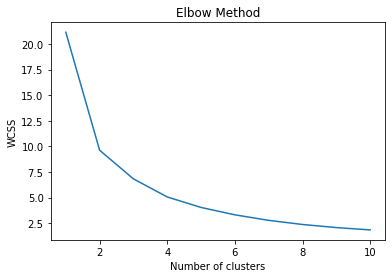

In [3]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(centroids)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

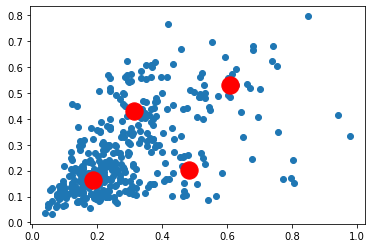

In [29]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(centroids)
x = [c[0] for c in centroids]
y = [c[1] for c in centroids]
plt.scatter(x, y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()